In [ ]:
#using Pkg;Pkg.activate("./")

# Chord Plot Example

This example plots the co-occurrence data embeded in a sparse matrix. The data is obtained from a disease co-occurrence anaysis on pubmed articles that are related to Epilepsy. For more details see [PubMedMiner.jl](https://github.com/bcbi/PubMedMiner.jl)

### Load data:

* Sparse matrix
* Labels

In [2]:
using JLD
using SparseArrays

In [ ]:
top_mesh_labels, top_coo_sp = JLD.load("./chord_data.jld", "top_mesh_labels", "top_coo_sp")

### If you get a warning like:
        "Warning: type Base.SparseArrays.SparseMatrixCSC{Core.Int64,Core.Int64} not present in workspace"
then the next step might fix it:

In [15]:
function fix_coords(sparsejld)
    SparseMatrixCSC(sparsejld.m,
                    sparsejld.n,
                    sparsejld.colptr,
                    sparsejld.rowval,
                    sparsejld.nzval)
end
top_coo_sp = fix_coords(top_coo_sp);

In [ ]:
display(top_coo_sp)
display(top_mesh_labels)

In [ ]:
# add Factory and PlotlyJS
## you might get a warning about Standard Libraries like LinearAlgebra, but it will work
using PlotlyJSFactory

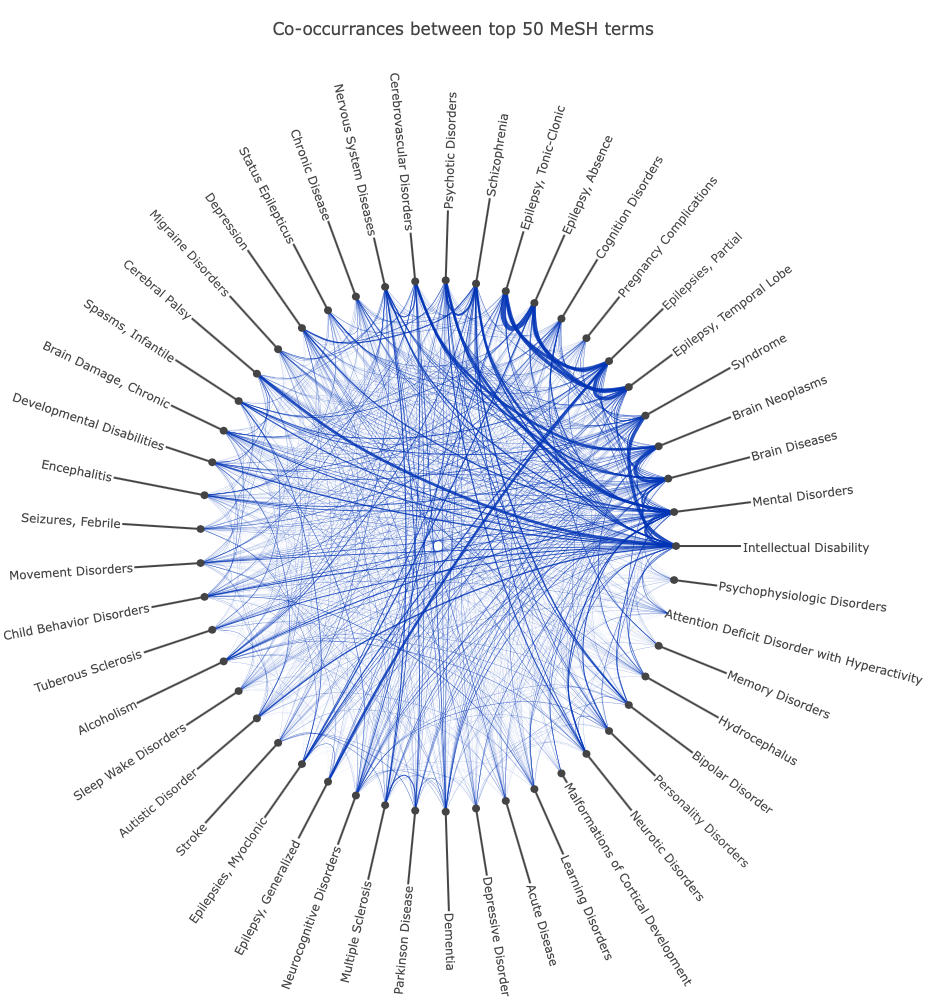

In [27]:
p = create_chord_plot(top_coo_sp, labels = top_mesh_labels)
PlotlyJSFactory.PlotlyJS.relayout!(p, title="Co-occurrances between top 50 MeSH terms")
p